In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/bike-sharing-demand/test.csv
/kaggle/input/bike-sharing-demand/sampleSubmission.csv
/kaggle/input/bike-sharing-demand/train.csv


In [2]:
train = pd.read_csv("/kaggle/input/bike-sharing-demand/train.csv")
test = pd.read_csv("/kaggle/input/bike-sharing-demand/test.csv")

In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
x_train = train.drop(["casual","registered","count","datetime"],axis=1)
y_train = train["count"]

In [5]:
x_test = test.drop("datetime",1)
x_test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,1,0,1,1,10.66,11.365,56,26.0027
1,1,0,1,1,10.66,13.635,56,0.0000
2,1,0,1,1,10.66,13.635,56,0.0000
3,1,0,1,1,10.66,12.880,56,11.0014
4,1,0,1,1,10.66,12.880,56,11.0014


In [6]:
x_train["hour"] = train["datetime"].astype('datetime64').dt.hour
x_test["hour"] = test["datetime"].astype('datetime64').dt.hour

# hour 변수 EDA

In [7]:
x_train["count"]=train["count"]
x_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,count
0,1,0,0,1,9.84,14.395,81,0.0,0,16
1,1,0,0,1,9.02,13.635,80,0.0,1,40
2,1,0,0,1,9.02,13.635,80,0.0,2,32
3,1,0,0,1,9.84,14.395,75,0.0,3,13
4,1,0,0,1,9.84,14.395,75,0.0,4,1


In [8]:
x_train["hour"].value_counts()

23    456
20    456
16    456
17    456
18    456
15    456
12    456
19    456
13    456
21    456
14    456
22    456
6     455
11    455
10    455
9     455
7     455
8     455
0     455
1     454
5     452
2     448
4     442
3     433
Name: hour, dtype: int64

In [9]:
x_test["hour"].value_counts()

16    274
17    274
15    273
14    273
13    273
23    272
19    272
8     272
12    272
20    272
9     272
21    272
10    272
18    272
22    272
7     272
11    272
0     271
6     270
1     270
2     267
5     265
3     264
4     255
Name: hour, dtype: int64

In [10]:
x_train["count"].groupby(x_train["hour"]).median()

hour
0      41.0
1      19.0
2      11.0
3       6.0
4       6.0
5      19.0
6      75.0
7     208.0
8     392.0
9     217.0
10    149.0
11    183.0
12    234.5
13    226.5
14    212.0
15    232.0
16    309.5
17    480.5
18    422.5
19    312.5
20    224.0
21    171.5
22    129.0
23     80.0
Name: count, dtype: float64

In [11]:
x_train["count"].groupby(x_train["hour"]).mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: count, dtype: float64

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

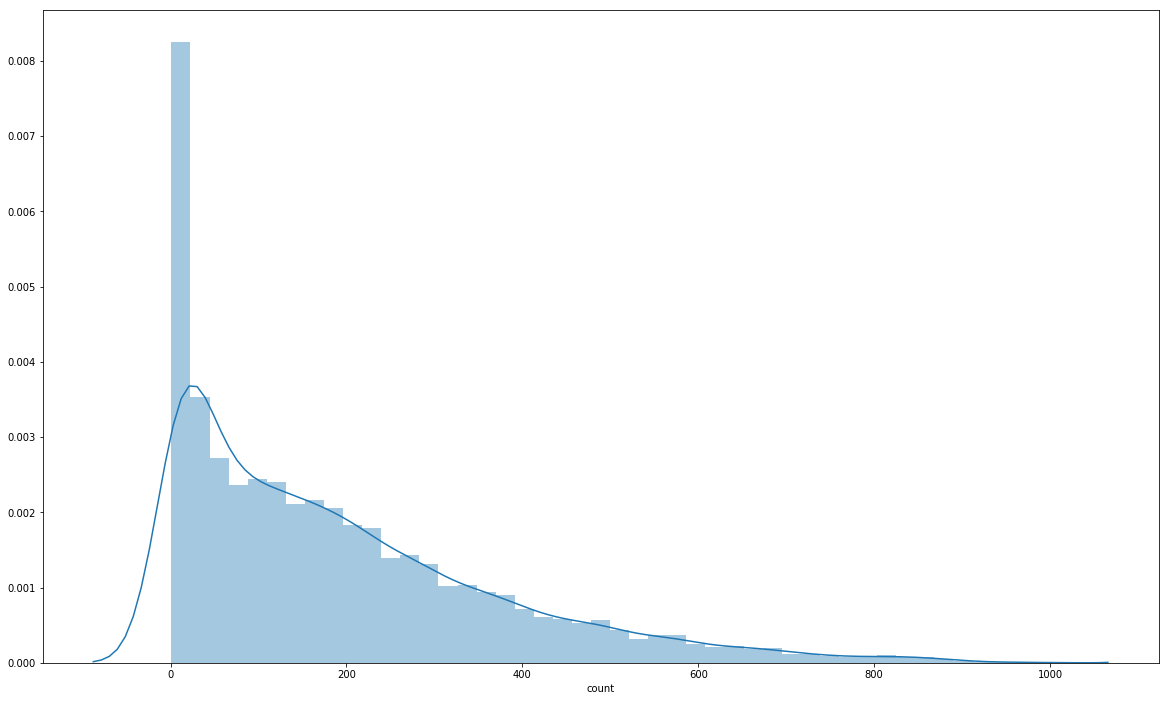

In [13]:
a, b = plt.subplots(1,1,figsize=(20,12))
sns.distplot(train["count"])
# 1. 데이터가 왼쪽으로 쏠려있고, 오른쪽 꼬리가 길다(outliar가 많다,700.800.900대....)
# 2. 정규분포가 아님 
# outliar가 많으면 모델성능 하락 ; rmse ,mse 
# outliar가 원데이터와 차이가 크지 않으면 penalty가적음/ but outliar와 다른 데이터와 차이가 크면 제곱으로 penalty가 가해지기 때문에 
# train set 의 outliar로 test set 의 outliar를 맞추기 힘듬/ 아웃라이어는 튀는 값이기 때문에 정상적인 데이터로 보기 힘듦; 이 데이터가 test set에 나타나리라는 보장이 없다. 
# 아웃라이어 제거 필요 --> 모델에 도움이 되는 아웃라이어도 존재/ --> 어떻게 지우지? --> log를 취해주면 튀는 값들을 작게 해줌. 예측할 때 튀지 않게
# 학습할 때 log취한 값으로 하기 때문에 good

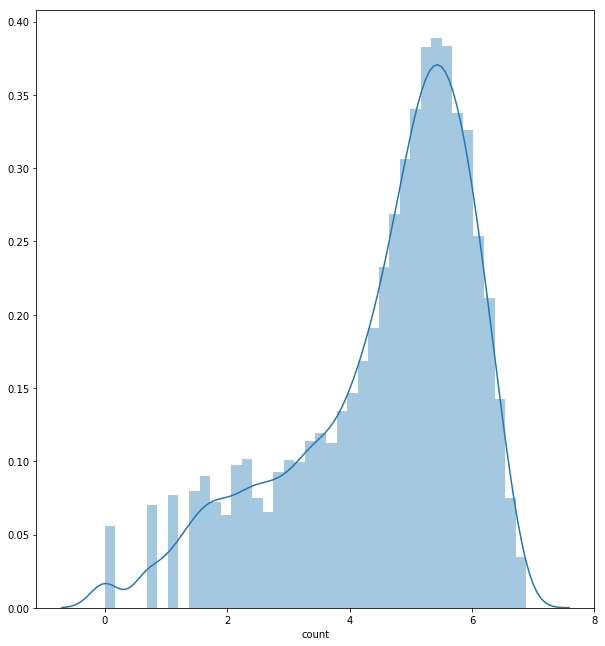

In [14]:
a,b = plt.subplots(1,1,figsize=(10,11))
sns.distplot(np.log(train["count"]))


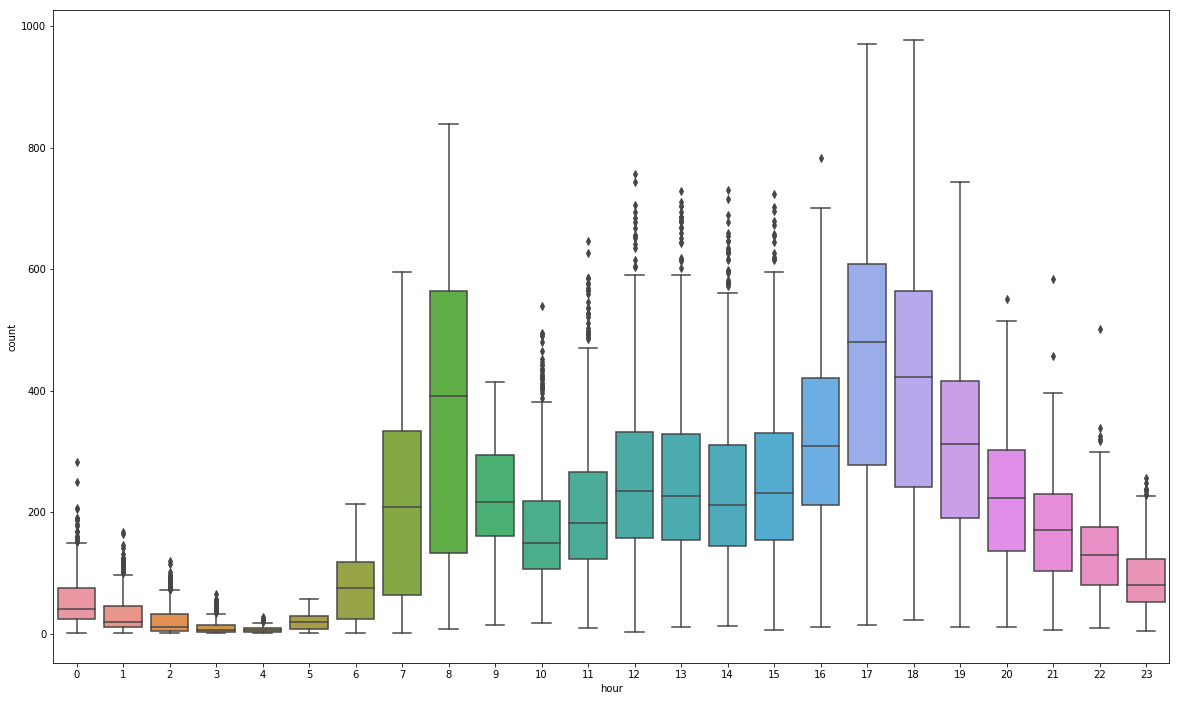

In [15]:
a,b = plt.subplots(1,1,figsize=(20,12))
sns.boxplot(x=x_train["hour"],y=x_train["count"])

In [16]:
weekday_df = x_train[x_train["workingday"]==1]

In [17]:
weekend_df = x_train[x_train["workingday"]==0]
weekend_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,count
0,1,0,0,1,9.84,14.395,81,0.0,0,16
1,1,0,0,1,9.02,13.635,80,0.0,1,40
2,1,0,0,1,9.02,13.635,80,0.0,2,32
3,1,0,0,1,9.84,14.395,75,0.0,3,13
4,1,0,0,1,9.84,14.395,75,0.0,4,1


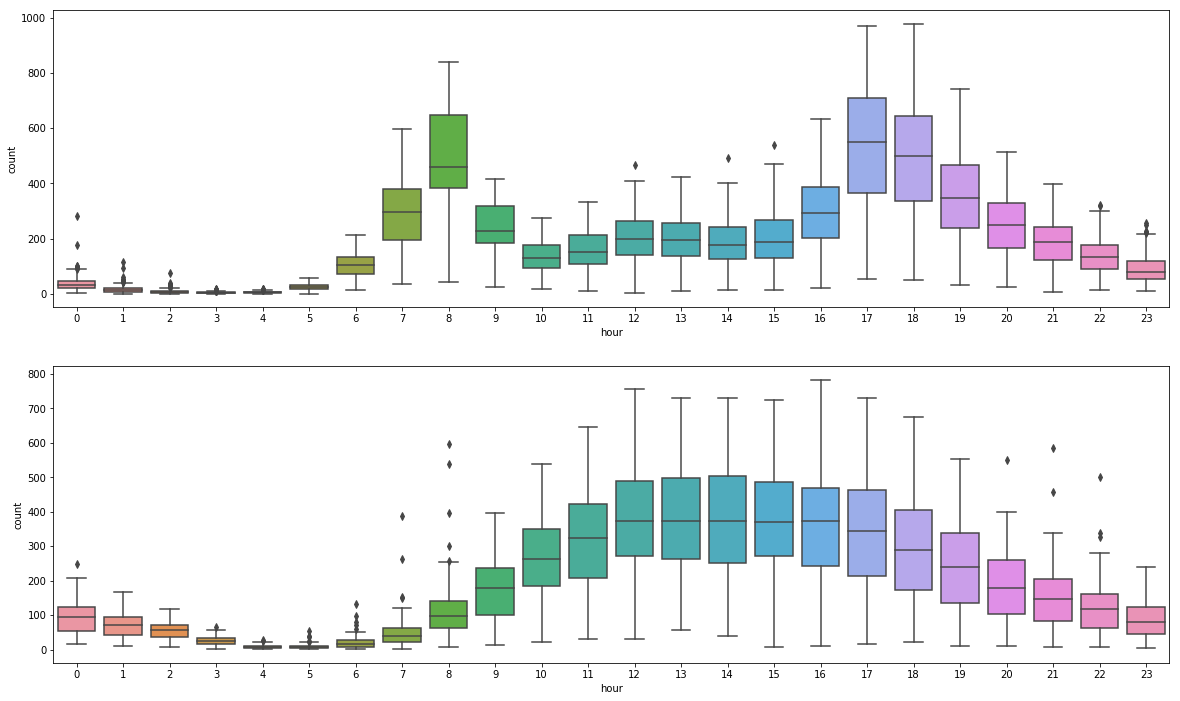

In [18]:
a,b = plt.subplots(2,1,figsize=(20,12))
sns.boxplot(x=weekday_df["hour"],y=weekday_df["count"],ax=b[0])
sns.boxplot(x=weekend_df["hour"],y=weekend_df["count"],ax=b[1])

In [19]:
weekday_df = x_train[x_train["holiday"]==0]
weekend_df = x_train[x_train["holiday"]==1]
weekend_df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,count
372,1,1,0,2,8.20,9.850,47,15.0013,0,17
373,1,1,0,2,8.20,9.850,44,12.9980,1,16
374,1,1,0,2,7.38,8.335,43,16.9979,2,8
375,1,1,0,2,7.38,9.090,43,12.9980,3,2
376,1,1,0,2,7.38,9.850,43,8.9981,4,3


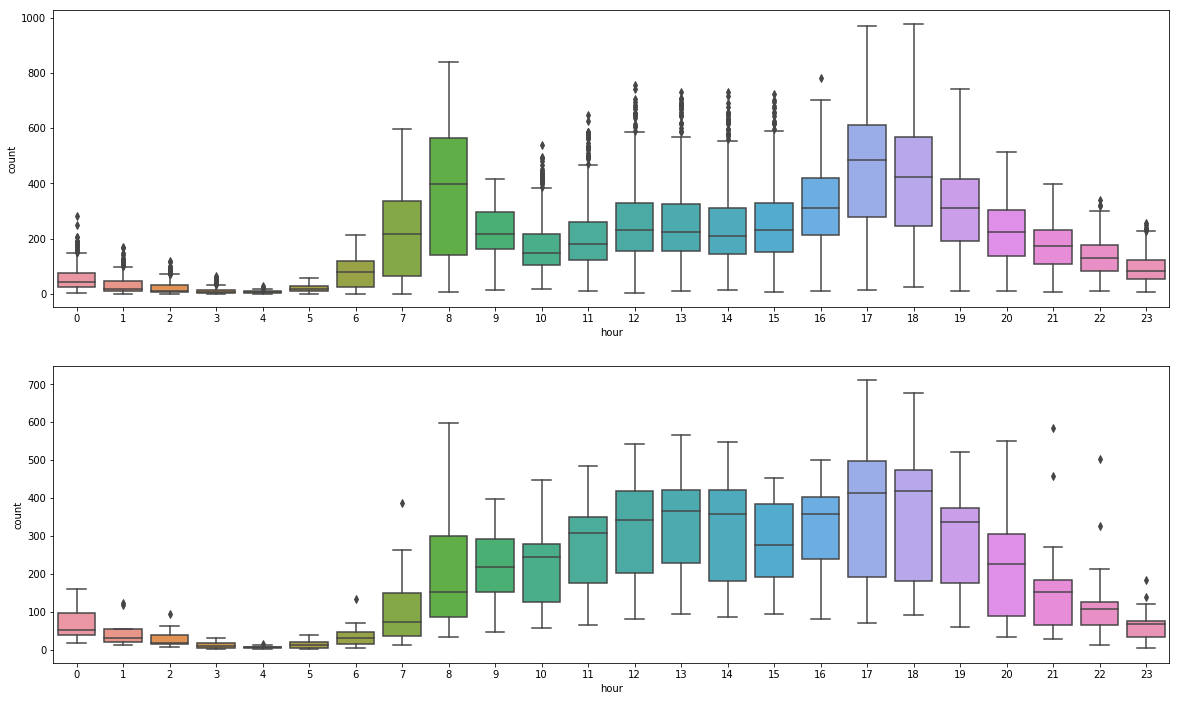

In [20]:
a,b = plt.subplots(2,1,figsize=(20,12))
sns.boxplot(x=weekday_df["hour"],y=weekday_df["count"],ax=b[0])
sns.boxplot(x=weekend_df["hour"],y=weekend_df["count"],ax=b[1])

### holiday/non-holiday는 non holiday일 때 이상치가 많다 (holiday는 아니지만 주말인 경우 차이가 있는 것)

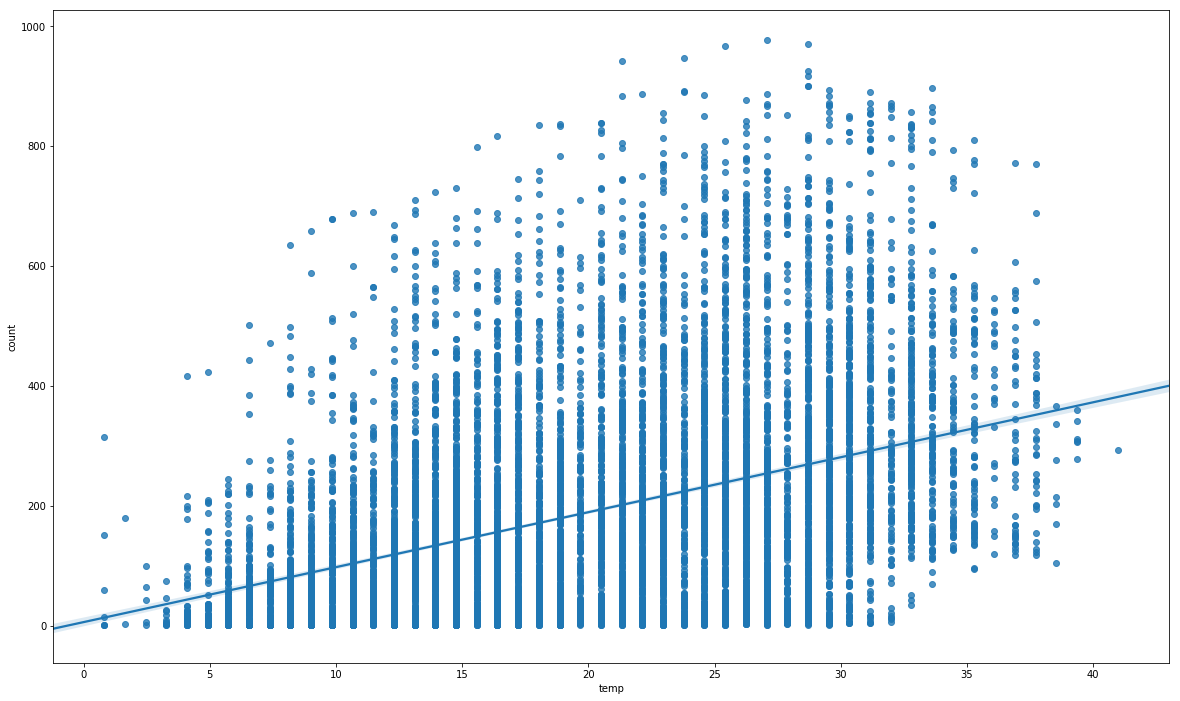

In [21]:
a,b = plt.subplots(1,1,figsize=(20,12))

sns.regplot(x_train["temp"],x_train["count"],data=x_train)

In [22]:
x_train["year"] = train["datetime"].astype('datetime64').dt.year
x_test["year"] = test["datetime"].astype('datetime64').dt.year

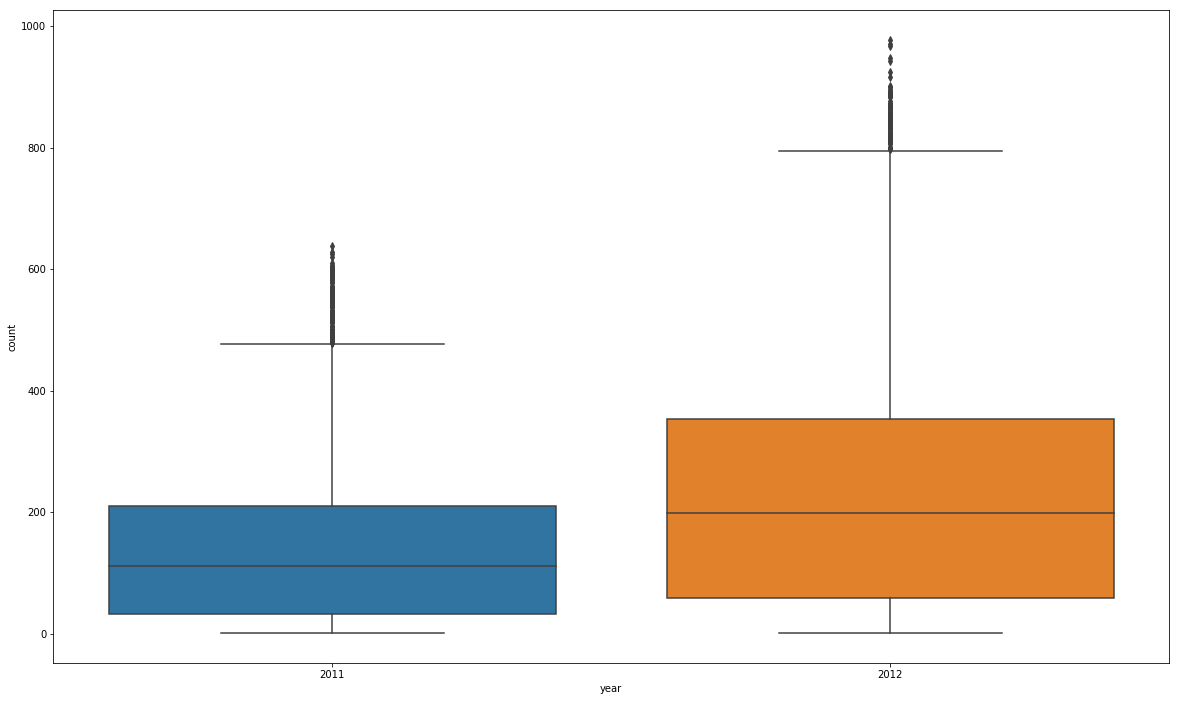

In [23]:
a,b = plt.subplots(1,1,figsize=(20,12))
sns.boxplot(x=x_train["year"],y=x_train["count"])

In [24]:
x_train["weekday"] = train["datetime"].astype("datetime64").dt.weekday
x_test["weekday"] = test["datetime"].astype("datetime64").dt.weekday

In [25]:
x_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,count,year,weekday
0,1,0,0,1,9.84,14.395,81,0.0,0,16,2011,5
1,1,0,0,1,9.02,13.635,80,0.0,1,40,2011,5
2,1,0,0,1,9.02,13.635,80,0.0,2,32,2011,5
3,1,0,0,1,9.84,14.395,75,0.0,3,13,2011,5
4,1,0,0,1,9.84,14.395,75,0.0,4,1,2011,5


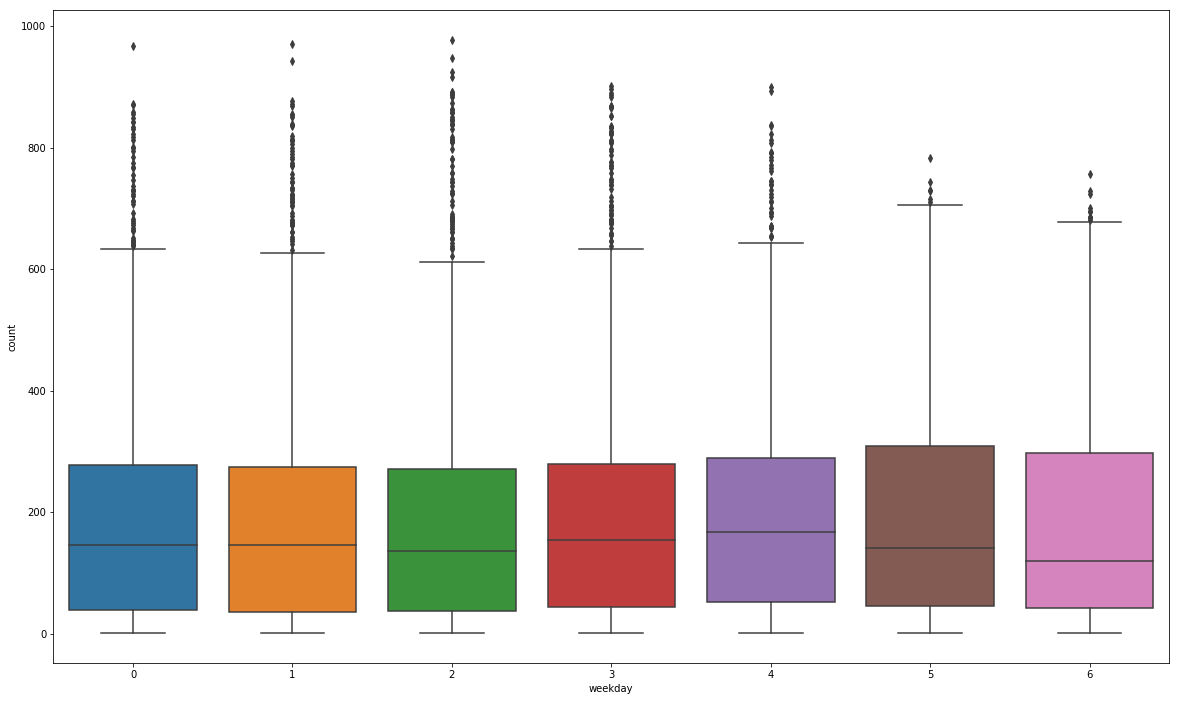

In [26]:
a,b = plt.subplots(1,1,figsize=(20,12))
sns.boxplot(x=x_train["weekday"],y=x_train["count"])

In [27]:
non_holiday = x_train[x_train["holiday"]==0]
holiday = x_train[x_train["holiday"]==1]

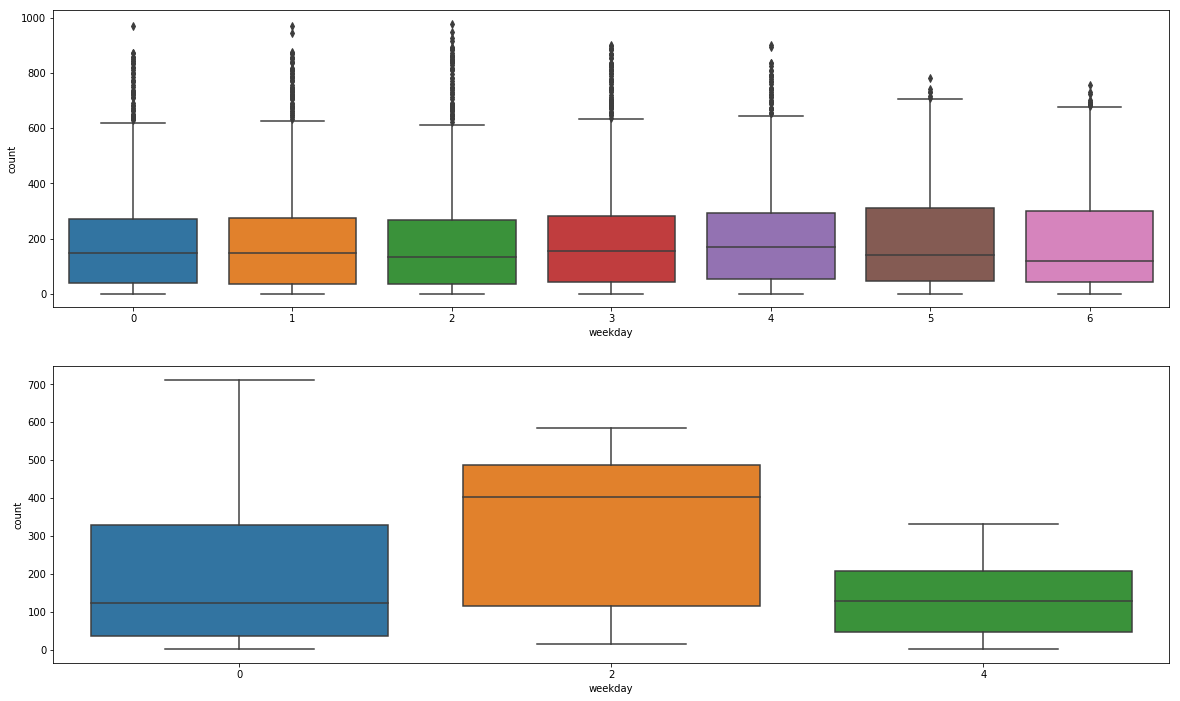

In [28]:
a,b = plt.subplots(2,1,figsize=(20,12))
sns.boxplot(x=non_holiday["weekday"],y=non_holiday["count"],ax=b[0])
sns.boxplot(x=holiday["weekday"],y=holiday["count"],ax=b[1])

In [29]:
non_workingday = x_train[x_train["workingday"]==0]
workingday = x_train[x_train["workingday"]==1]

In [30]:
non_workingday["weekday"].value_counts()

5    1584
6    1579
0     239
4      48
2      24
Name: weekday, dtype: int64

In [31]:
non_workingday = non_workingday.replace({"weekday":2},{"weekday":0})


In [32]:
non_workingday["weekday"].value_counts()

5    1584
6    1579
0     263
4      48
Name: weekday, dtype: int64

In [33]:
workingday["weekday"].value_counts()

3    1553
1    1539
2    1527
4    1481
0    1312
Name: weekday, dtype: int64

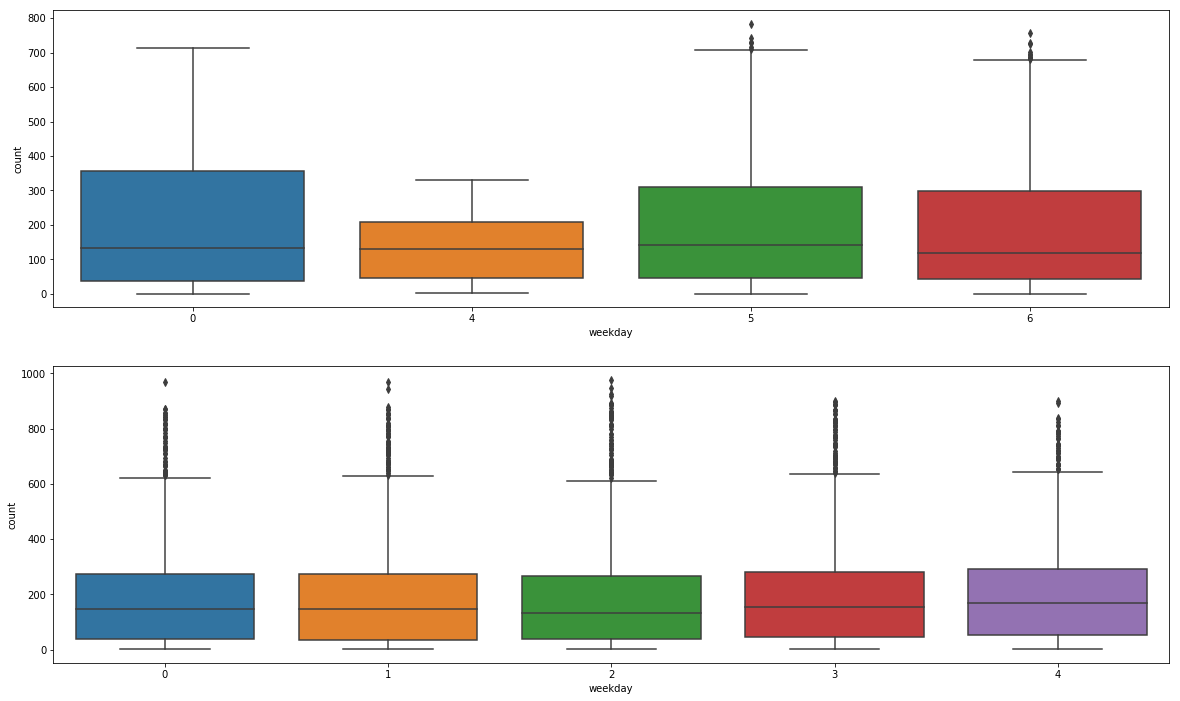

In [34]:
a,b = plt.subplots(2,1,figsize=(20,12))
sns.boxplot(x=non_workingday["weekday"],y=non_workingday["count"],ax=b[0])
sns.boxplot(x=workingday["weekday"],y=workingday["count"],ax=b[1])

In [35]:
x_train= x_train.drop("count",1)


In [36]:
from lightgbm import LGBMRegressor
lgb = LGBMRegressor()

In [37]:
#xgboost는 학습을 잘 못함 ;; max_depth =3 

In [38]:
lgb.fit(x_train,np.log(y_train))

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [39]:
result =np.exp(lgb.predict(x_test))

In [40]:
submission = pd.read_csv("/kaggle/input/bike-sharing-demand/sampleSubmission.csv")

In [41]:
submission["count"] = result
submission.head()

,datetime,count
0,2011-01-20 00:00:00,10.230455
1,2011-01-20 01:00:00,4.962407
2,2011-01-20 02:00:00,2.955541
3,2011-01-20 03:00:00,2.062522
4,2011-01-20 04:00:00,1.767986


In [42]:
submission.to_csv("submission.csv",index=False)